<a href="https://colab.research.google.com/github/DuongDuyThoai/bai-tap-AI/blob/main/X%C3%A1c_%C4%91%E1%BB%8Bnh_c%C3%A1c_lo%E1%BA%A1i_s%C3%A2u_b%E1%BB%87nh_tr%C3%AAn_c%C3%A2y_c%C3%A0_chua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đề tài 14: Xác định các loại sâu bệnh trên cây cà chua

In [ ]:
#thêm thư viện
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Project_cuối_kỳ

/content/gdrive/MyDrive/Colab Notebooks/Project_cuối_kỳ


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# Tạo bộ dữ liệu train_set
train_set = train_data.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Project_cuối_kỳ/train ca chua',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 5000 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu train_set
train_set.class_indices

{'Bệnh bạc lá sớm': 0,
 'Bệnh héo úa muộn': 1,
 'Bệnh mốc lá Cà chua': 2,
 'Bệnh ve nhện – Spider mites': 3,
 'Bệnh đốm lá': 4,
 'Bệnh đốm lá Septoria': 5,
 'Bệnh đốm vi khuẩn': 6,
 'Virus khảm cà chua': 7,
 'Virus vàng xoăn lá cà chua': 8,
 'khỏe  mạnh': 9}

In [ ]:
# Tạo bộ dữ liệu test_set
test_set = train_data.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Project_cuối_kỳ/validation ca chua',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1500 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu test_set
test_set.class_indices

{'Bệnh bạc lá sớm': 0,
 'Bệnh héo úa muộn': 1,
 'Bệnh mốc lá Cà chua': 2,
 'Bệnh ve nhện – Spider mites': 3,
 'Bệnh đốm lá': 4,
 'Bệnh đốm lá Septoria': 5,
 'Bệnh đốm vi khuẩn': 6,
 'Virus khảm cà chua': 7,
 'Virus vàng xoăn lá cà chua': 8,
 'khỏe  mạnh': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 1010 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#100 lần học (epochs), mỗi lần học thì chỉ học 500 dữ liệu (batch_size)
model.fit(train_set,epochs=100,batch_size=500,verbose=1)

157/157 [==============================] - 37s 235ms/step - loss: 0.0470 - accuracy: 0.9844
Epoch 91/100
157/157 [==============================] - 38s 243ms/step - loss: 0.0710 - accuracy: 0.9828
Epoch 92/100
157/157 [==============================] - 37s 235ms/step - loss: 0.0241 - accuracy: 0.9932
Epoch 93/100
157/157 [==============================] - 37s 237ms/step - loss: 0.0330 - accuracy: 0.9902
Epoch 94/100
157/157 [==============================] - 37s 235ms/step - loss: 0.0352 - accuracy: 0.9884
Epoch 95/100
157/157 [==============================] - 37s 235ms/step - loss: 0.0198 - accuracy: 0.9932
Epoch 96/100
157/157 [==============================] - 37s 235ms/step - loss: 0.0342 - accuracy: 0.9922
Epoch 97/100
157/157 [==============================] - 38s 242ms/step - loss: 0.0297 - accuracy: 0.9926
Epoch 98/100
157/157 [==============================] - 37s 236ms/step - loss: 0.0315 - accuracy: 0.9910
Epoch 99/100
157/157 [==============================] - 37s 236ms/st

In [ ]:
# Lưu lại mô hình
model.save('Nhan_benh_ca_chua.h5')

In [ ]:
# Tải mô hình
model_benh = load_model('Nhan_benh_ca_chua.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0034152965527027845
Train Accuracy 0.9987999796867371


1/1 [==============================] - 0s 14ms/step
Đây là bệnh : Bệnh đốm lá Septoria


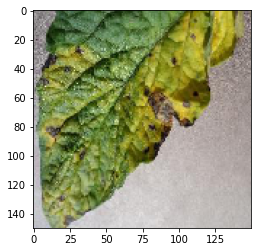

In [ ]:
#test mô hình
img = load_img('/content/1.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_benh.predict(img)
class_benh=['Bệnh bạc lá sớm',
 'Bệnh héo úa muộn',
 'Bệnh mốc lá Cà chua',
 'Bệnh ve nhện – Spider mites',
 'Bệnh đốm lá',
 'Bệnh đốm lá Septoria',
 'Bệnh đốm vi khuẩn',
 'Virus khảm cà chua',
 'Virus vàng xoăn lá cà chua',
 'khỏe  mạnh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là bệnh :", class_benh[a])

1/1 [==============================] - 0s 13ms/step
Đây là bệnh : Bệnh đốm lá


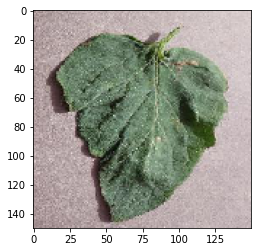

In [ ]:
img = load_img('/content/2.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_benh.predict(img)
class_benh=['Bệnh bạc lá sớm',
 'Bệnh héo úa muộn',
 'Bệnh mốc lá Cà chua',
 'Bệnh ve nhện – Spider mites',
 'Bệnh đốm lá',
 'Bệnh đốm lá Septoria',
 'Bệnh đốm vi khuẩn',
 'Virus khảm cà chua',
 'Virus vàng xoăn lá cà chua',
 'khỏe  mạnh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là bệnh :", class_benh[a])

1/1 [==============================] - 0s 15ms/step
Đây là bệnh : Bệnh đốm lá Septoria


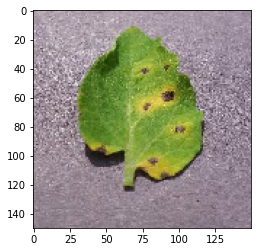

In [ ]:
img = load_img('/content/3.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_benh.predict(img)
class_benh=['Bệnh bạc lá sớm',
 'Bệnh héo úa muộn',
 'Bệnh mốc lá Cà chua',
 'Bệnh ve nhện – Spider mites',
 'Bệnh đốm lá',
 'Bệnh đốm lá Septoria',
 'Bệnh đốm vi khuẩn',
 'Virus khảm cà chua',
 'Virus vàng xoăn lá cà chua',
 'khỏe  mạnh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là bệnh :", class_benh[a])

1/1 [==============================] - 0s 13ms/step
Đây là bệnh : Bệnh đốm vi khuẩn


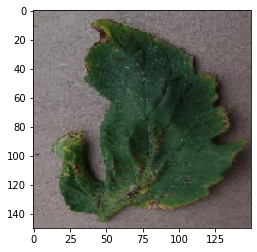

In [ ]:
img = load_img('/content/4.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_benh.predict(img)
class_benh=['Bệnh bạc lá sớm',
 'Bệnh héo úa muộn',
 'Bệnh mốc lá Cà chua',
 'Bệnh ve nhện – Spider mites',
 'Bệnh đốm lá',
 'Bệnh đốm lá Septoria',
 'Bệnh đốm vi khuẩn',
 'Virus khảm cà chua',
 'Virus vàng xoăn lá cà chua',
 'khỏe  mạnh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là bệnh :", class_benh[a])

1/1 [==============================] - 0s 15ms/step
Đây là bệnh : Bệnh héo úa muộn


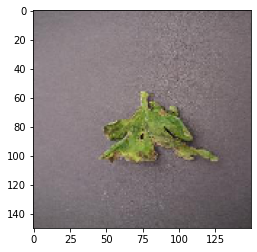

In [ ]:
img = load_img('/content/5.JPG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_benh.predict(img)
class_benh=['Bệnh bạc lá sớm',
 'Bệnh héo úa muộn',
 'Bệnh mốc lá Cà chua',
 'Bệnh ve nhện – Spider mites',
 'Bệnh đốm lá',
 'Bệnh đốm lá Septoria',
 'Bệnh đốm vi khuẩn',
 'Virus khảm cà chua',
 'Virus vàng xoăn lá cà chua',
 'khỏe  mạnh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là bệnh :", class_benh[a])